In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle


In [2]:
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [15]:
# mnist.data.iloc[1, :].values.reshape(28, 28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train, Y_train)
pred = rf_clf.predict(X_test)
acc = accuracy_score(Y_test, pred)
print(acc)


0.976


['5', '4', '7', '6', '1', '5', '4', '4', '9', '4']


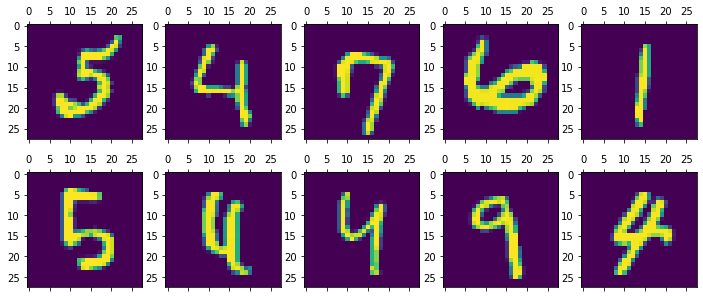

In [4]:
n_test = len(X_test)
random_pick = np.random.randint(0, n_test, 10)

figure = plt.figure(figsize=(12, 5))
axes = []
tmp_list = []


for i in range(0, 10):
    axes.append(figure.add_subplot(2, 5, i+1))
    tmp = X_test.iloc[random_pick[i]]
    tmp = np.array(tmp).reshape(28, 28)
    tmp_list.append(tmp)

print(Y_test.iloc[random_pick].tolist())

for i in range(10):
    axes[i].matshow(tmp_list[i])
    

['0']


c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


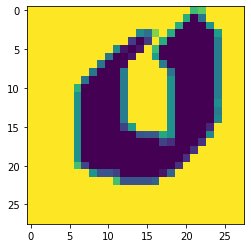

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['6']


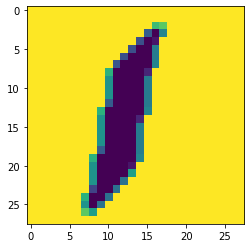

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['2']


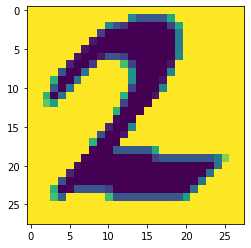

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


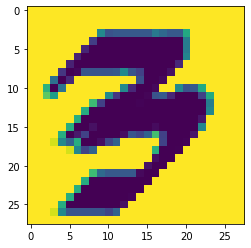

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['4']


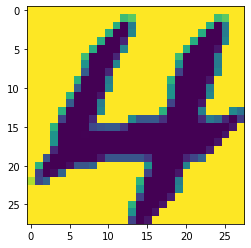

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['0']


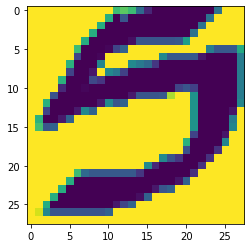

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['0']


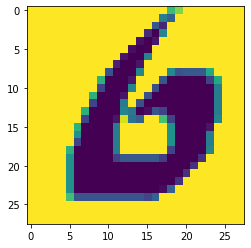

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['2']


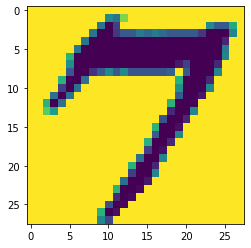

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


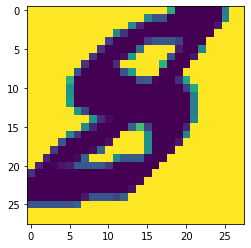

c:\Users\test\.conda\envs\HRD\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['7']


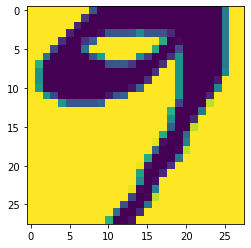

In [5]:
for path in glob.glob('./digit/*.png'): # .png 모든 파일 경로 가져옴
    img = Image.open(path).convert('L') # gray scale
    plt.imshow(img)
    # print(np.resize(img, (1, 784)))
    img = np.resize(img, (1, 784))
    img = 255 - img
    pred = rf_clf.predict(img)
    print(pred)
    plt.show()


In [54]:
# pickle: 파이썬 객체 그 자체를 저장
f = open('./digit/model.pickle', mode='wb') # 그냥 w는 글자, b는 byte, 이미지 등
pickle.dump(rf_clf, f) #dumps: 메모리 상에 올라온 것, dump: 파일로 되있는거, open했으니까 dump
f.close()

In [55]:
# 저장된 객체 가져오기
f = open('./digit/model.pickle', 'rb')
model = pickle.load(f)
f.close()

d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['0']


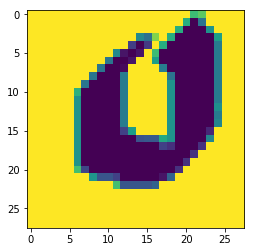

['6']


d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


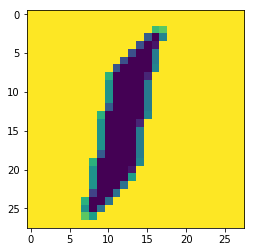

d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['2']


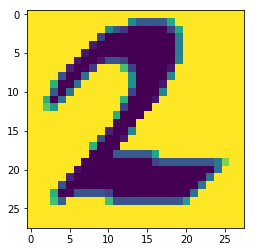

d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['3']


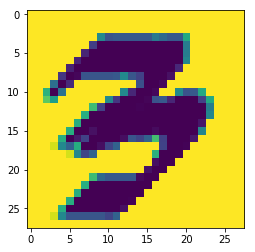

['4']


d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


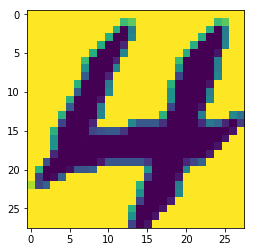

['0']


d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


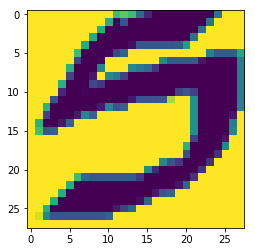

d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['0']


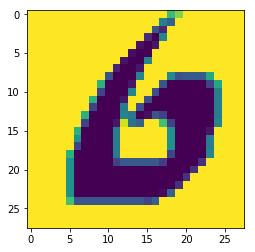

d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['2']


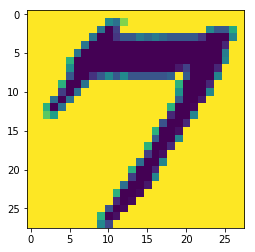

d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['8']


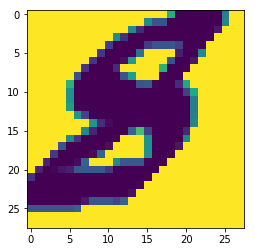

d:\Users\Pringles\anaconda3\envs\hrd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['7']


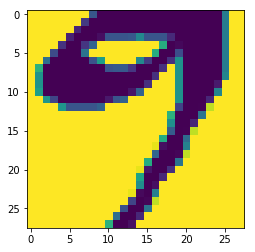

In [56]:
for path in glob.glob('./digit/*.png'): # .png 모든 파일 경로 가져옴
    img = Image.open(path).convert('L') # gray scale
    plt.imshow(img)
    # print(np.resize(img, (1, 784)))
    img = np.resize(img, (1, 784))
    img = 255 - img
    pred = model.predict(img)
    print(pred)
    plt.show()